## Sample: How to use Kernel CMSM

### Data information
- Generate 200 random data.
- A generated data is 1000 dimension.
- Data include 2 classes.
- Each class has 100 data.

In [2]:
#Data Generator
import numpy as np
import kernel_cmsm
X = []
label = np.asarray([])
np.random.seed(1)
for i in range(100):
    x = np.random.rand(1000, 1) * 5
    x[0:100] += np.random.rand(100, 1) * 2
    x = x / np.linalg.norm(x)
    X.append(x)
    
for i in range(100):
    x = np.random.rand(1000, 1) * 5
    x[0:100] -= np.random.rand(100, 1) * 2
    x = x / np.linalg.norm(x)
    X.append(x)

cp = kernel_cmsm.Utils()
label = cp.create_label(100, 2)


print(type(X))
print(len(X))        
print(X[0].shape)  
print(label)
print(label.shape)            

<class 'list'>
200
(1000, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(200,)


In [4]:
# Learning the KGDS
import kernel_cmsm

n_subdim = 10
n_sigma = np.sqrt(2)

kcmsm = kernel_cmsm.KernelCMSM(n_subdim = n_subdim, n_sigma = n_sigma)
print('Start learning')
kcmsm.fit(X, label)
print('Done')


Start learning
Done


(1000, 200)


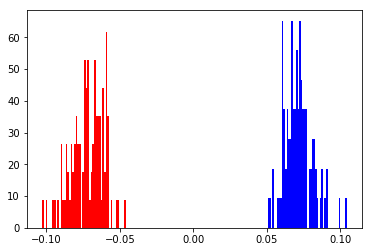

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 


#Projected data must be included 2D-matrix
data = np.hstack(X[:])
print(data.shape)

# GDS projection of each data
prj_data = kcmsm.vectors_gds_projection(data)


# plot projected data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(prj_data[0, label == 0], bins=50, normed=True, color='red');
ax.hist(prj_data[0, label == 1], bins=50, normed=True, color='blue');